In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Automatically created module for IPython interactive environment
[  3.19286906e-39   8.50243215e-13   4.91915197e-01]


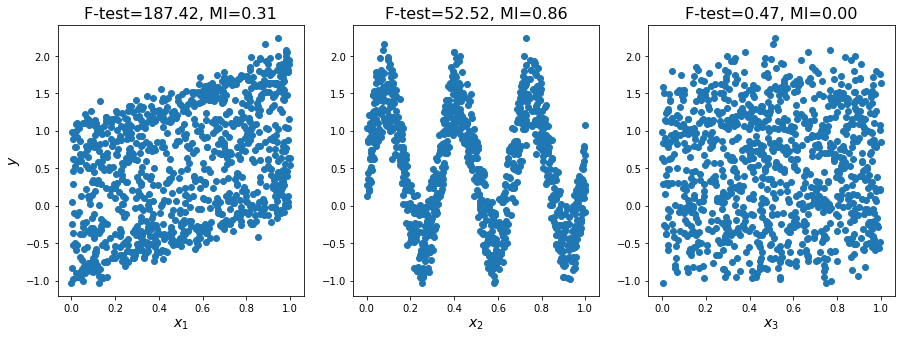

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

f_test, _ = f_regression(X, y)
print(_)
#f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.show()

[ 1.]


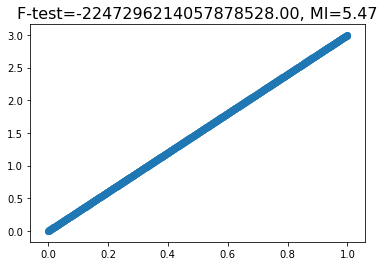

In [3]:
x = np.arange(0, 1000) * 0.001
y = 3 * x

f_test, _ = f_regression(x[:, np.newaxis], y)
print(_)
mi = mutual_info_regression(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[0], mi[0]), fontsize=16)
plt.show()

[ 0.98626905]


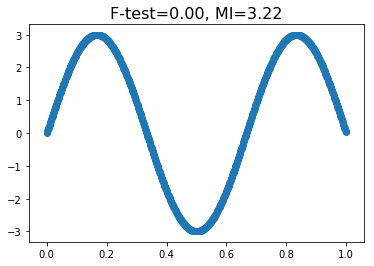

In [4]:
x = np.arange(0, 1000) * 0.001
y = 3 * np.sin(3 * np.pi * x)

f_test, _ = f_regression(x[:, np.newaxis], y)
print(_)
mi = mutual_info_regression(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[0], mi[0]), fontsize=16)
plt.show()

In [5]:
from welllogs.ml.fs import f_test
from welllogs.ml.util import iris

df = iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
f_test(df, features=df.columns[:-1], labels=df.columns[-1])

,F_val,p_val
sepal_length,119.264502,1.669669e-31
sepal_width,47.364461,1.327917e-16
petal_length,1179.034328,3.051976e-91
petal_width,959.324406,4.376957e-85


In [14]:
from welllogs.ml.fs import mutual_info

mutual_info(df, features=df.columns[:-1], labels=df.columns[-1])

,mutual_info
sepal_length,0.502804
sepal_width,0.270015
petal_length,0.975729
petal_width,0.987031


In [41]:
from bokeh.plotting import show
from bokeh.charts import Scatter

plt = Scatter(df, 'petal_width', 'petal_length', color='label')
show(plt)